# **Problem Statement for Personal Loan Campaign**


> **Business Context**

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.



> **Objecttive**


1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.


#  Data Description
   Here we have data for existing account holders for AllLife Bank with 14 different  attirubtes  , details  of each attribute is as followes . 
# Data Dictionary

1. ID: Customer ID
2. Age: Customer’s age in completed years
3. Experience: #years of professional experience
4. Income: Annual income of the customer (in thousand dollars)
5. ZIP Code: Home Address ZIP code.
6. Family: the Family size of the customer
7. CCAvg: Average spending on credit cards per month (in thousand dollars)
8. Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
9. Mortgage: Value of house mortgage if any. (in thousand dollars)
10. Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
11. Securities_Account: Does the customer have securities account with the bank?
12. CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
13. Online: Do customers use internet banking facilities?
14. CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


# Import Necessary Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 250)

## For Spliting Training and Testing Data 
from sklearn.model_selection import train_test_split
## For Logistic regressionModel Building 

# To build model for prediction
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# For Buidling Decision Tree 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# Connect to Google Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read File in DataFrame

In [7]:
Loandata=pd.read_csv('/content/drive/MyDrive/Project3-PersonalLoanCampaign/Loan_Modelling.csv')

## Let us create copy for future use 
data=Loandata.copy()

# Let us do Basic Statistical summary and Data exploration

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
data.isnull().values.any()

False

In [10]:
data.shape

(5000, 14)

There are total 5000 observations with 13 Predictor variables and Personal_Loan as Outcome/Target column.There are no null values in this data set.

In [11]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


##Observations

1. Looing at ID is serial column which we can remove in subsequent steps.
2. Age data is normally distrubuted with mean and median around same   value range of 45 and 75% people are in age are 55 or below.
3. In experience Column min value is -3 which is strange as experience cannot be negative hence we will check data in this column in details.
4. Income data is right skewed 
5. 75% of the Families in this data set have 
3 or less members.
6. Personal Loan is target variable with 0 and 1 as values.
7. Security Account,CD_Account,Online,Credit card are all categorical columns with  0 and 1 values .
8. Zip code also we need to analyze it further.
9. We can see majority of the people in this data set have 0 Mortgage and the maximum Mortgage a person has is $635 and 75% of people have loan amount less and 101.



In [12]:
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no duplicates in this data set .

In [13]:
# ID  contains all unique values and we won't need this column for analysis hence we will drop it .
data.drop('ID',inplace=True,axis=1)


In [14]:
data['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

# Exploratory Analysis

In [15]:
## Let us create list of all columns .
columns=list(data)
## Let us check  data distribution for Categorical Columns 
## Lets make List of Categorical Columns
catogoricalColumns=['Family','Education','Securities_Account','CD_Account','Online','CreditCard']

 ## Functions to help in Exploratory Analysis

1. **Plot_histogram_boxplot**: To Understand distibution of data for each  Columns by plotting Histpgram and Box Plot .
2. **histogramforPredictor_Target**  To Understand  if  for each predictor variable is there any factors which contribute to yes and no outcome of Target
3. **PlotDistributionTable**  To check  distibution of caterogical prector column 



In [16]:
## To Understand distibution of data for each Columns by plotting Histpgram and Box Plot on same line .


def Plot_histogram_boxplot(feature,var,bincount):
     
    plt.figure(figsize=(10,4));

   ## We will use subplot which takes  three arguments ,number of rows , number of columns and
    ## position of plot in that context as input 
    
    ## Histogram
    plt.subplot(1,2,1)
    plt.title("Distribution of data for  "+ var, fontsize=15)
    sns.histplot(feature, kde=False, bins=bincount)
    plt.axvline(np.mean(feature), color='blue', linestyle='--') # Add mean to the histogram
    plt.text(np.mean(feature)+0.15,30,'Mean = '+str(round(np.mean(feature),1)),rotation=90, fontsize=15)
    plt.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    plt.text(np.median(feature)+0.15,30,'Median = '+str(round(np.median(feature),1)),rotation=90, fontsize=15)
    
    ##  Box Plot 
    plt.subplot(1,2,2)
    plt.title("Boxplot for "+ var, fontsize=15)
    sns.boxplot(feature);

In [17]:
#To Understand if for each predictor variable is there any factors which contribute to yes(1) and no(0) outcome of Target
def histogramforPredictor_Target(data, predictor, target):

    plt.figure(figsize=(10,4));
    plt.subplot(1,2,1)
    target_uniq = data[target].unique()
    plt.title("Distribution of data for  "+  str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        color="teal",
        stat="density",
    )
    plt.subplot(1,2,2)
    plt.title("Distribution of data for  "+  str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        color="violet",
        stat="density",
    )

    plt.tight_layout()
    plt.show()

In [18]:
# check distibution of Categorical columns
def PlotDistributionTable(data,catogoricalColumns):

    for col in catogoricalColumns:
     print("Distribution  for " ,col)
     print("-" * 60)
     print(data[col].value_counts())
     print("-" * 40)
    

## Univariate Analysis

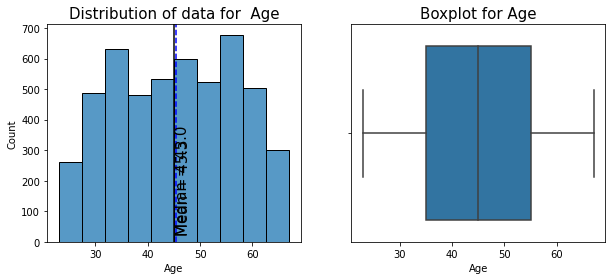

In [19]:
Plot_histogram_boxplot(data['Age'],'Age',10)

Age has some outlines but mostly it's normally distributed.

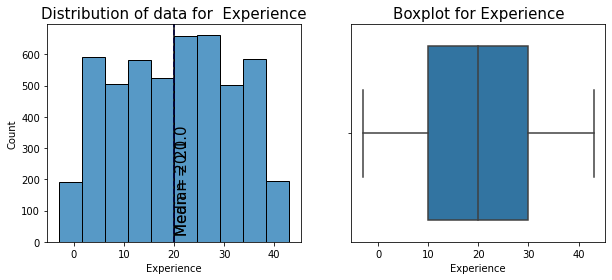

In [20]:
Plot_histogram_boxplot(data['Experience'],'Experience',10)

We have see that there are some negative entries in Experience let us check this further .

In [21]:
data[data['Experience']<0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


Experience Can not be negative , it can be 0 or more . Most of the  people with experience value as negative have income which means they are working . Hence let us convert negative to positive  as it appears to be data entry error .

In [22]:
data['Experience']=data['Experience'].map(lambda x:-x if x<0 else x)


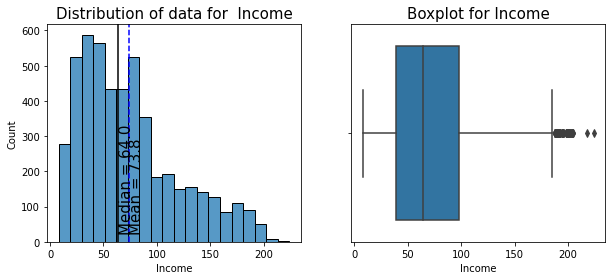

In [23]:
Plot_histogram_boxplot(data['Income'],'Income',20)

We can see  income data is right skewed and have some outliers.we will  inspect this further in bivariate analysis if high income is co related to experience , Age, education . 

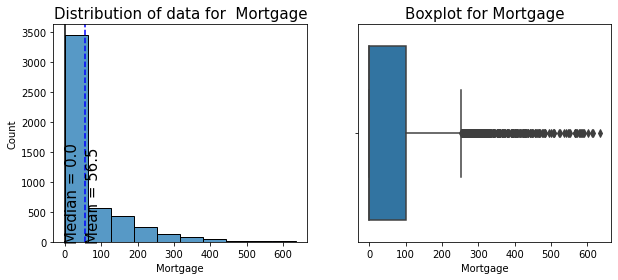

In [24]:
Plot_histogram_boxplot(data['Mortgage'],'Mortgage',10)

Mortgage data is highly righ skewed with very few people have taken loan and and people who have taken loan range till 635 .

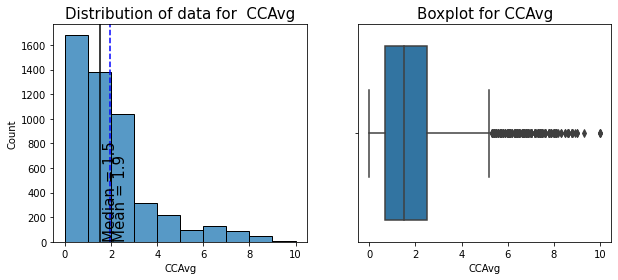

In [25]:
Plot_histogram_boxplot(data['CCAvg'],'CCAvg',10)

We can this is also right skewed data and have some outliers .

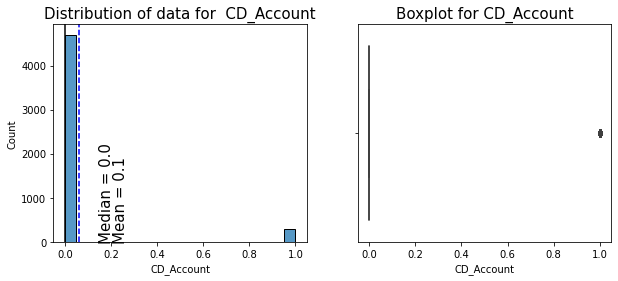

In [26]:
Plot_histogram_boxplot(data['CD_Account'],'CD_Account',20)

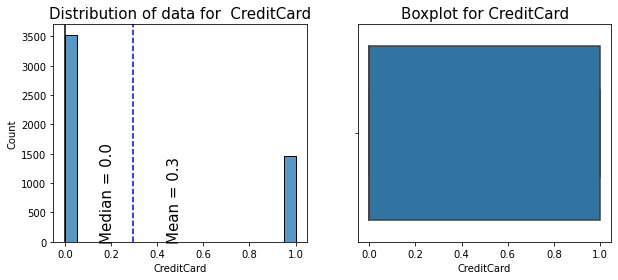

In [27]:
Plot_histogram_boxplot(data['CreditCard'],'CreditCard',20)

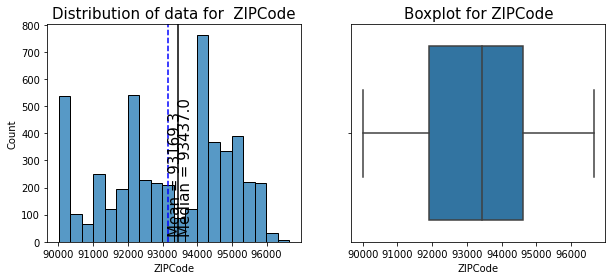

In [28]:
Plot_histogram_boxplot(data['ZIPCode'],'ZIPCode',20)

we can find major cities , counties based on zip code and that can help us in analyzing  it's imapct in customer buying loan.We will  use uszip code which contains method to look up cities, state etc based on zipcode.

In [29]:
# Lets' check if we can find Cities corresponding to zip code see's it's distribution 

! pip install --upgrade uszipcode
from uszipcode import SearchEngine, SimpleZipcode, ComprehensiveZipcode

city=[]
county=[]

search = SearchEngine()
for i in np.arange(0, len(data['ZIPCode'])):
    zipcode1 = search.by_zipcode(data['ZIPCode'][i])
    # Sometimes it returns None object  so we will return Unknow as value for such scenarios
    if zipcode1 is not None:
     city.append(zipcode1.major_city)
     county.append(zipcode1.county)
    else:
      city.append('Unknown')
      county.append('Unknown')
    
data['major_city']=city
data['county']=county
#data['major_city'].value_counts()



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 3.2 MB/s 
     |████████████████████████████████| 121 kB 42.0 MB/s 
Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [30]:
data['county'].nunique()

39

In [31]:
data['major_city'].nunique()

245

We will use   Country as additional columns and will drop Zip code .

In [32]:
data.drop(['ZIPCode','major_city'],axis=1,inplace=True)

 ## Data Distibution for Categorical Columns

In [33]:
PlotDistributionTable(data,catogoricalColumns)

Distribution  for  Family
------------------------------------------------------------
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
----------------------------------------
Distribution  for  Education
------------------------------------------------------------
1    2096
3    1501
2    1403
Name: Education, dtype: int64
----------------------------------------
Distribution  for  Securities_Account
------------------------------------------------------------
0    4478
1     522
Name: Securities_Account, dtype: int64
----------------------------------------
Distribution  for  CD_Account
------------------------------------------------------------
0    4698
1     302
Name: CD_Account, dtype: int64
----------------------------------------
Distribution  for  Online
------------------------------------------------------------
1    2984
0    2016
Name: Online, dtype: int64
----------------------------------------
Distribution  for  CreditCard
---------------------------

In [37]:
checkLoanDistribution=data.groupby('Personal_Loan').mean().round(2).T


In [46]:
checkLoanDistribution

Personal_Loan,0,1
Age,45.37,45.07
Experience,20.17,19.84
Income,66.24,144.75
Family,2.37,2.61
CCAvg,1.73,3.91
Education,1.84,2.23
Mortgage,51.79,100.85
Securities_Account,0.10,0.12
CD_Account,0.04,0.29
Online,0.60,0.61


Income , Credit card spending averange ( CCAvg) , Mortgage, Education have   substancial impact in personal buying  Personal Loan .To analyze it further let us Plot Target vaiable with important  predictor variable .

##Let us do some Bivariate Analysis##

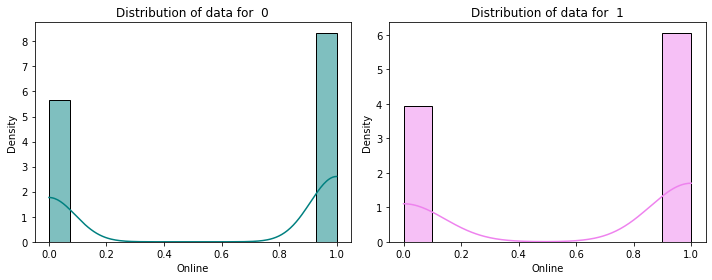

In [44]:
histogramforPredictor_Target(data,'Online','Personal_Loan')

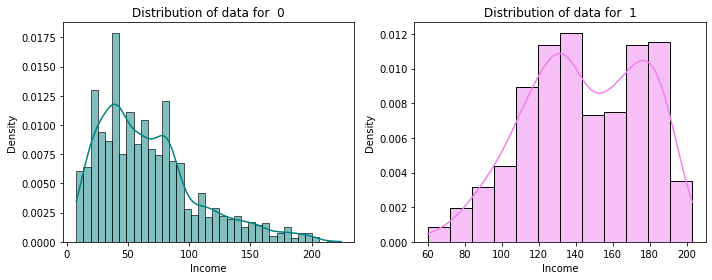

In [39]:
histogramforPredictor_Target(data, "Income", "Personal_Loan")

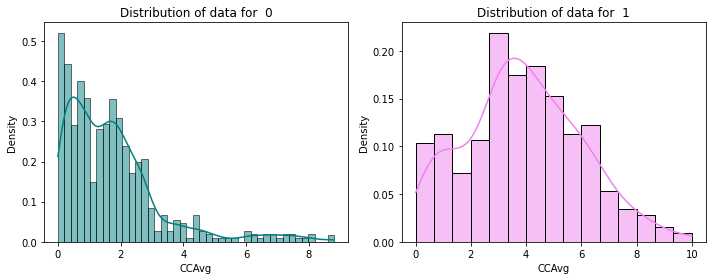

In [40]:
histogramforPredictor_Target(data, "CCAvg", "Personal_Loan")

We can see people having more credir card usage tend to take Loans .

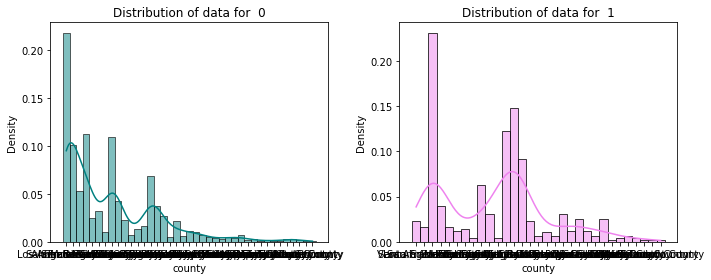

In [41]:
histogramforPredictor_Target(data, "county", "Personal_Loan")

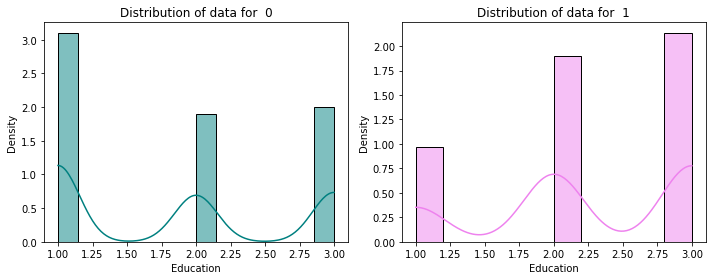

In [42]:
histogramforPredictor_Target(data,'Education','Personal_Loan')

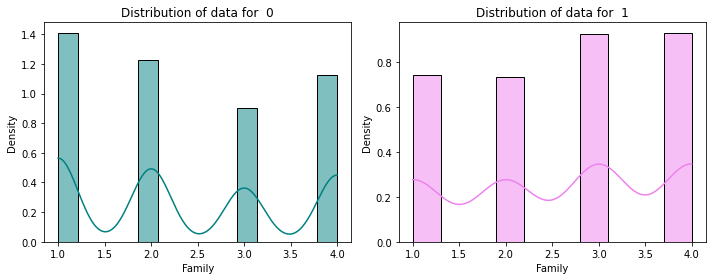

In [ ]:
histogramforPredictor_Target(data, "Family", "Personal_Loan")

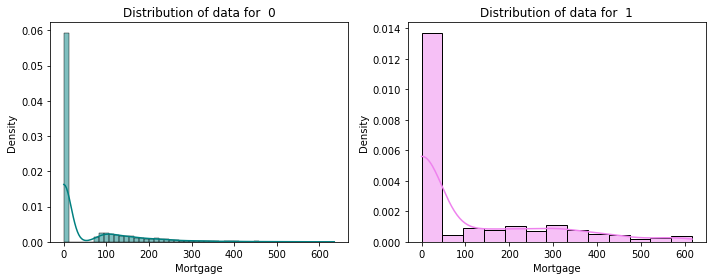

In [43]:
histogramforPredictor_Target(data,'Mortgage','Personal_Loan')

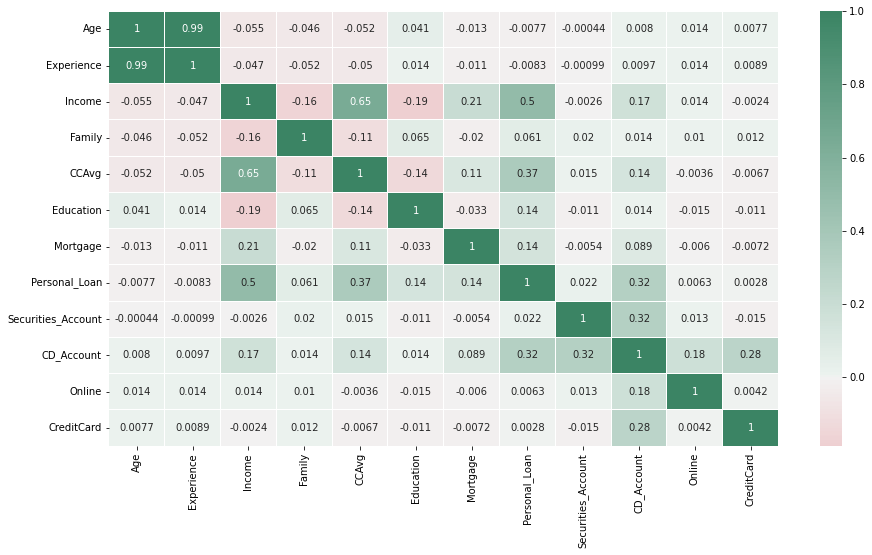

In [47]:
plt.figure(figsize=(15,8))

cmap=sns.diverging_palette(10, 150, as_cmap=True)

ax=sns.heatmap(data=data.corr(),
            annot=True,
            linewidths=.1,
            center=0,
            cbar=True,
            cmap=cmap
            )
plt.show()

There is no significant corelation between any two columns except Age and Experince and Income and CCAvg.In Age and Experience  and Income and CCAvg there is positve co-relation.

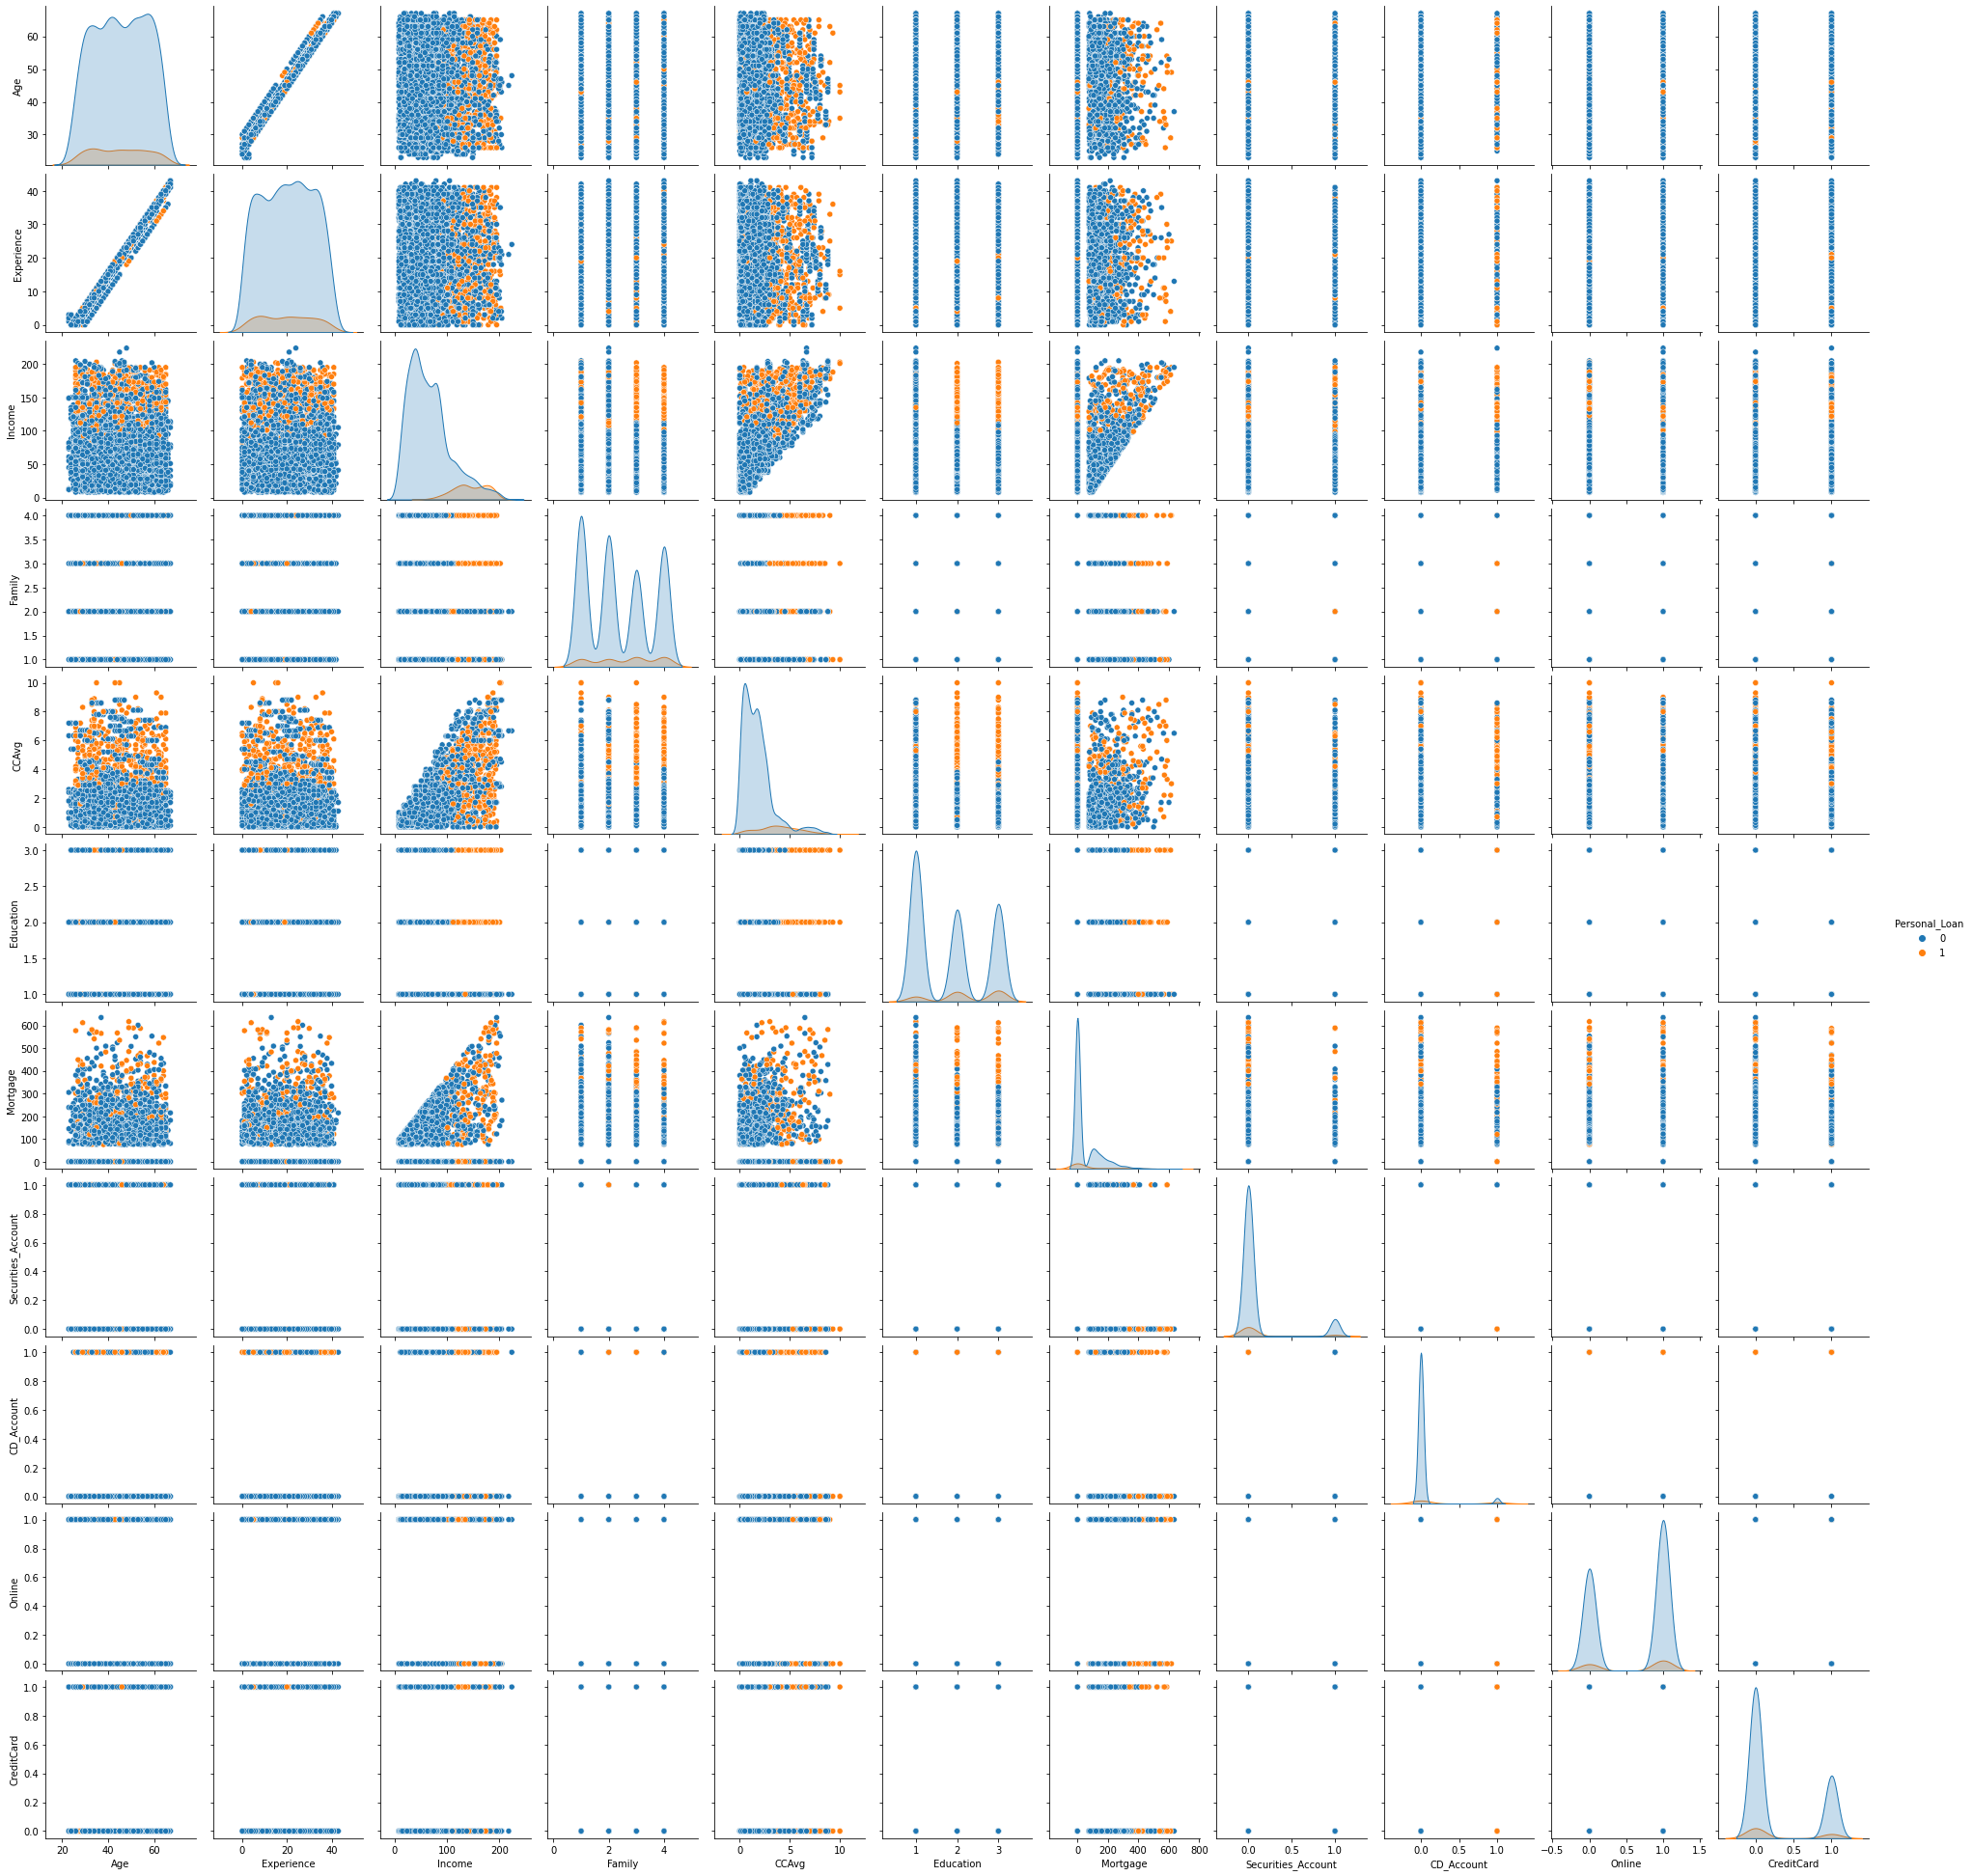

In [48]:
sns.pairplot(data,hue='Personal_Loan',diag_kind='kde')

# Model Creation 

1.	Data Preparation and Splitting Data in Train and Test Set

2.	First Build Logistic Regression Model
    1.	we will create model with default threshold, model based on ROC(AUC Curve) and PR curve .
    2.	We will compare performance with all these logistic regression three model by calculating accuracy, Recall, Precision and F1 Score

3.	Next, we will build Decision Tree
    1.	We will first Build default decision tree
    2.	Then we will prune model using hyper parameter tuning
    3.	We will compare performance of all decision tree models
    4.	Based on results we will evaluate which model to choose.


# Model Evaluation

**TP**
1.  Actual:Personal will buy Personal Loan 
2.  Model: Model Predits that  Personl will buy loan 
3.  Outcome :Model is good 

**TN**
1.  Actual:Personal will not buy Personal Loan 
2.  Model: Model Predits that  Personl will not buy loan 
3.  Outcome :No impact on business 


**FP**
1.  Actual:Personal will not buy Personal Loan 
2.  Model: Model Predits that  Personl will buy loan 
3.  Outcome : Bank spends more time in persuaing the opportinity which will not convert into Business 


**FN**
1.  Actual:Personal will buy Personal Loan 
2.  Model: Model Predits that  Personl will not  buy loan 
3.  Outcome : Bank Looses the potential Business as they are not going to Persure these candidates for personal Loan . (Loss)

## What is Important 
  If Customer is actaully a potential candidate to Buy Home Loan but model does not predit that then there is Loss of Business . In terms of parameters  it means we should work on reducing FN which means  we should work on having better recall score as recall = TP /(TP+FN)

##How to reduce the losses?
Bank would like  recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives which means Bank can target and convert more Customers who will  actaully buy loan ( i.e. they will  get converted into asset).

Let us check distribution of Personal Loan with respect to some important predictor vairables ( Income , CCAvg, Education , Mortgate ) and see whether we have Logical boundraries in Yes and No values  . It  will give some idea  whether Logistic regression is better for this dataset or to go for Decision Tree.

In [49]:
# Let us see each variable has impact on  target variable
result=data.groupby(by='Personal_Loan').mean().round(2).T
result

Personal_Loan,0,1
Age,45.37,45.07
Experience,20.17,19.84
Income,66.24,144.75
Family,2.37,2.61
CCAvg,1.73,3.91
Education,1.84,2.23
Mortgage,51.79,100.85
Securities_Account,0.10,0.12
CD_Account,0.04,0.29
Online,0.60,0.61


From previous analysis we have see that CCAvg ,Income ,Morgage have colierality . Let us see by plotting these variable and see if there is logical boundary in Target variable

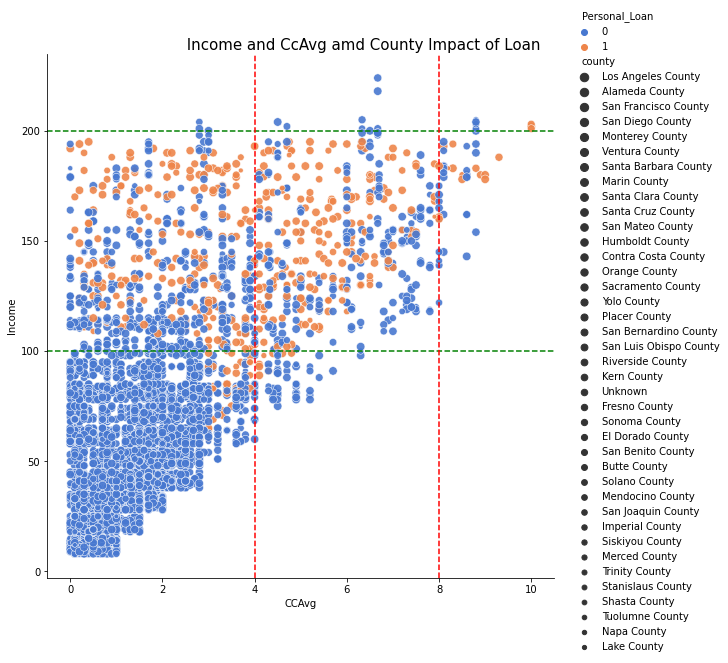

In [50]:
g2=sns.relplot(x="CCAvg", y="Income", hue="Personal_Loan", size="county",
            alpha=.9, palette="muted",
            height=8, data=data, legend="full");

g2.fig.suptitle(" Income and CcAvg amd County Impact of Loan", y=1.01, fontsize=15); 
g2.map(plt.axhline, y=100, ls='--', c='green');
g2.map(plt.axhline, y=200, ls='--', c='green');
g2.map(plt.axvline, x=4, ls='--', c='red');
g2.map(plt.axvline, x=8, ls='--', c='red');

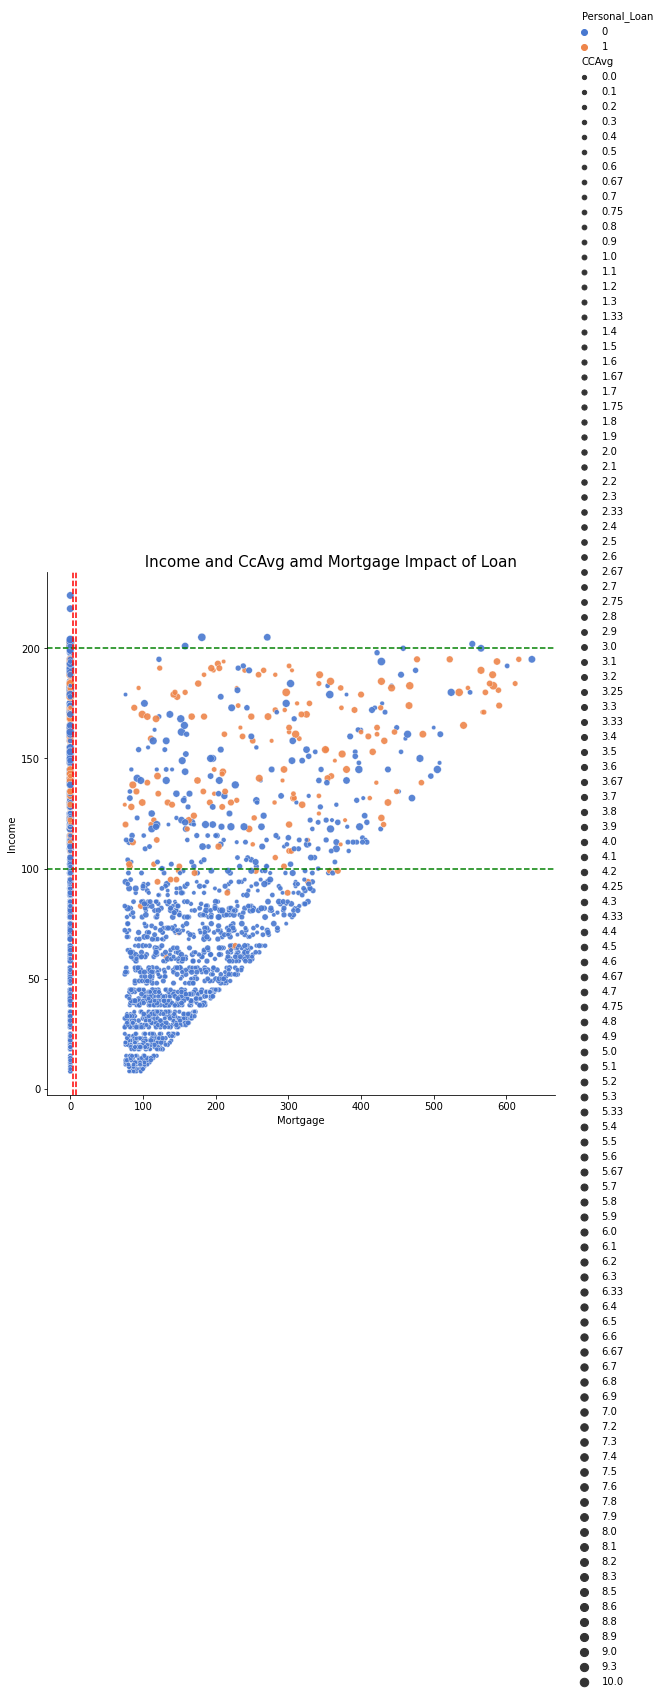

In [53]:
g2=sns.relplot(x="Mortgage", y="Income", hue="Personal_Loan", size="CCAvg",
            alpha=.9, palette="muted",
            height=8, data=data, legend="full");

g2.fig.suptitle(" Income and CcAvg amd Mortgage Impact on Loan", y=1.01, fontsize=15); 
g2.map(plt.axhline, y=100, ls='--', c='green');
g2.map(plt.axhline, y=200, ls='--', c='green');
g2.map(plt.axvline, x=4, ls='--', c='red');
g2.map(plt.axvline, x=8, ls='--', c='red');

Logistic regression has linear boundary but looking at graph we can  see with high Income odd of  taking Personal Loan is high but same is not always true with CCAvg . Hence we will evaluateLogistic regression as well as Decision tree and based on results we will come up with recommnation .

In [57]:
data1=data.copy()

# Fuctions to Check Model Perforamance 
  1. **Check_ModelPerformance** : We will create this fcuntion to find performance factor for each logistic regression model ( Accuracy , recall , Precision and F1 score)
  2. **Plot_ConfusionMatrix** : Fucntional to plot confunsion matric for Logistic Regression Models

In [54]:
# we will create one single function which will create datafrmae with all perfomance paramters i.e Accurancy ,
##Precision , recall and F1 Score .by default threshould value will be 0.5 and as we evalue with PR and ROC curve we will pass different threshould values 
  ##  to this 

    #model: classifier
   # predictors: independent variables
   # target: dependent variable
   # threshold: threshold for classifying the observation as class 1

def Check_ModelPerformance(model, predictors, target, threshold=0.5):
   
    # predicting using the independent variables
    predicted_probablity = model.predict_proba(predictors)[:, 1]
    predicted_threshould = predicted_probablity > threshold
    prediction = np.round(predicted_threshould)

    accurancy = accuracy_score(target, prediction)  # to compute Accuracy
    recall = recall_score(target, prediction)  # to compute Recall
    precision = precision_score(target, prediction)  # to compute Precision
    f1 = f1_score(target, prediction)  # to compute F1-score

    # creating a result dataframe of metrics
    result = pd.DataFrame(
        {
            "Accuracy": accurancy,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return result

In [55]:
def Plot_ConfusionMatrix(model, predictors, target, threshold=0.5):

   ## To  take values at index 1 as it contains probablity for 1 
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("Actual ")
    plt.xlabel("Predicted")
    

# Logistic Regression Model

In [58]:
for col in catogoricalColumns:
    data1[col] = data1[col].astype('category',copy=False)

In [59]:
# Personal Loan is target variable so let us drop it from X ( predictor data set)
X=data1.drop('Personal_Loan' ,axis=1)

In [60]:
Y=data1['Personal_Loan']

In [61]:
X=pd.get_dummies(X,drop_first=True)

 Let us split Data in Training and Testing set with 30 % data in Test set .

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [64]:
# Let us create Logistic regression model with solver as newton-cg
model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, Y_train)

In [65]:
#  Let us Find Co-efficient and get them in row
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,county_Butte County,county_Contra Costa County,county_El Dorado County,county_Fresno County,county_Humboldt County,county_Imperial County,county_Kern County,county_Lake County,county_Los Angeles County,county_Marin County,county_Mendocino County,county_Merced County,county_Monterey County,county_Napa County,county_Orange County,county_Placer County,county_Riverside County,county_Sacramento County,county_San Benito County,county_San Bernardino County,county_San Diego County,county_San Francisco County,county_San Joaquin County,county_San Luis Obispo County,county_San Mateo County,county_Santa Barbara County,county_Santa Clara County,county_Santa Cruz County,county_Shasta County,county_Siskiyou County,county_Solano County,county_Sonoma County,county_Stanislaus County,county_Trinity County,county_Tuolumne County,county_Unknown,county_Ventura County,county_Yolo County
coef,0.010942,-0.006472,0.057459,0.212806,0.000858,-0.116498,2.158988,1.432739,3.317262,3.536997,-0.721388,2.988928,-0.497078,-0.831094,-0.13274,0.169166,-0.263335,-0.163305,-0.321374,-0.005977,0.964792,-0.019454,-0.039698,0.228728,-0.209711,-0.159929,-0.072285,-0.005672,0.030126,0.474269,1.06921,0.054833,-0.12641,-0.57745,0.077012,0.16423,-0.006241,-0.334001,-0.943167,0.254663,0.156139,0.091623,-0.274648,-0.062652,0.465235,0.535335,-0.325827,-0.108197,-0.081308,0.324512,0.11555,-0.303786



*   Expereince  , Family of 2 , having secutiry account , credit card have negative co-efficients which means they will contribute to people not preferring to buy personal Loan

*   We can see that People with Education Level Graduate or More and people with Family size of three  , People have CD Account will contribute to person buying Loan.



##Converting coefficients to odds##
The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
Therefore, odds = exp(b)


In [66]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,county_Butte County,county_Contra Costa County,county_El Dorado County,county_Fresno County,county_Humboldt County,county_Imperial County,county_Kern County,county_Lake County,county_Los Angeles County,county_Marin County,county_Mendocino County,county_Merced County,county_Monterey County,county_Napa County,county_Orange County,county_Placer County,county_Riverside County,county_Sacramento County,county_San Benito County,county_San Bernardino County,county_San Diego County,county_San Francisco County,county_San Joaquin County,county_San Luis Obispo County,county_San Mateo County,county_Santa Barbara County,county_Santa Clara County,county_Santa Cruz County,county_Shasta County,county_Siskiyou County,county_Solano County,county_Sonoma County,county_Stanislaus County,county_Trinity County,county_Tuolumne County,county_Unknown,county_Ventura County,county_Yolo County
Odds,1.011002,0.993549,1.059142,1.237145,1.000859,0.890032,8.662366,4.190159,27.584711,34.363573,0.486077,19.864386,0.608306,0.435572,0.875692,1.184317,0.768485,0.849332,0.725152,0.994041,2.624241,0.980734,0.961079,1.257000,0.810819,0.852205,0.930265,0.994344,1.030584,1.606839,2.913076,1.056364,0.881253,0.561328,1.080055,1.178485,0.993778,0.716053,0.389393,1.290027,1.168988,1.095951,0.759840,0.939270,1.592389,1.708020,0.721930,0.897451,0.921909,1.383356,1.122491,0.738019
Change_odd%,1.100179,-0.645113,5.914154,23.714514,0.085884,-10.996838,766.236618,319.015907,2658.471134,3336.357331,-51.392298,1886.438615,-39.169418,-56.442764,-12.430769,18.431679,-23.151538,-15.066803,-27.484771,-0.595870,162.424053,-1.926576,-3.892070,25.699961,-18.918145,-14.779536,-6.973468,-0.565614,3.058401,60.683868,191.307632,5.636389,-11.874688,-43.867201,8.005489,17.848543,-0.622202,-28.394701,-61.060735,29.002734,16.898846,9.595123,-24.016028,-6.073006,59.238863,70.802015,-27.806967,-10.254913,-7.809063,38.335606,12.249075,-26.198124


##Coefficient interpretations##
age : Holding all other features constant a unit change in age increse the odds of a customer buying personal loan will be 1.01 times or a 01.1.03 % increase in the odds.
Expereince  : Holding all other features constant a unit change in experience increse the odds of a customer buying personal loan will be 0.99 times or  
0.64% decrase in the odds.
education3 :  Holding all other features constant a unit change in education3  ( Adavance qualification)a unit change in experience increse the odds of a customer buying personal loan will be 34 times 


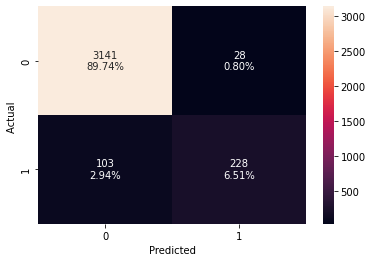

In [67]:
Plot_ConfusionMatrix(lg,X_train,Y_train)

In [68]:
LogisticRegression_TrainData = Check_ModelPerformance(lg, X_train, Y_train)

print("Training performance:")
LogisticRegression_TrainData

Training performance:


,Accuracy,Recall,Precision,F1
0,0.962571,0.688822,0.890625,0.776831


In [69]:
LogisticRegression_TestData = Check_ModelPerformance(lg, X_test, Y_test)

print("Testing performance:")
LogisticRegression_TestData

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.954,0.597315,0.908163,0.720648


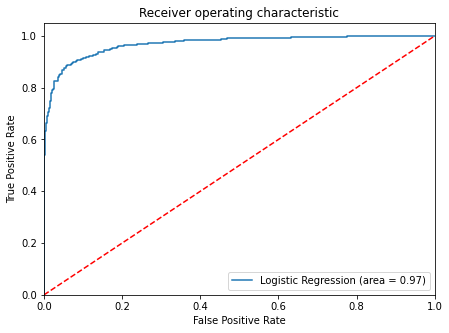

In [70]:
# Checking Performance  using ROC(AUC curve) and finding Optimum threshold
logit_roc_auc_train = roc_auc_score(Y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(Y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

It is giving good performance with AUC 0.97 but recall  for training data set but recall is low .

In [71]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(Y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.14594098770889669


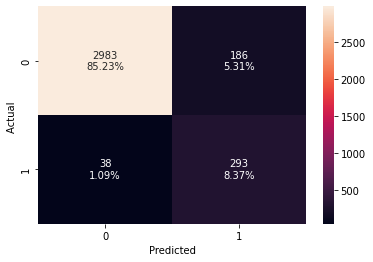

In [73]:
# creating confusion matrix for threshold=optimal_threshold_auc_roc
Plot_ConfusionMatrix(
    lg, X_train, Y_train, threshold=optimal_threshold_auc_roc
)

In [74]:
LogisticRegression_threshold_auc_roc_TrainData = Check_ModelPerformance(lg, X_train, Y_train,threshold=optimal_threshold_auc_roc)

print("Training performance:")
LogisticRegression_threshold_auc_roc_TrainData

Training performance:


,Accuracy,Recall,Precision,F1
0,0.936,0.885196,0.611691,0.723457


In [75]:
LogisticRegression_threshold_auc_roc_TestData = Check_ModelPerformance(lg, X_test, Y_test,threshold=optimal_threshold_auc_roc)

print("Testing performance:")
LogisticRegression_threshold_auc_roc_TestData

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.927333,0.805369,0.6,0.687679


We can see that recall has improved significantly for training as well as testing data .

## Let's use Precision-Recall curve and see if we can find a better threshold

In [76]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(Y_train, y_scores,)


In [77]:
##Let us Plot  Precision , recall with threshld
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


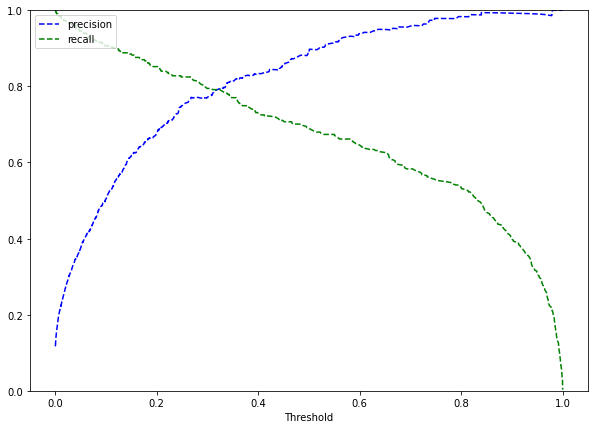

In [78]:
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [79]:
# Optimal threshold as per Precision-Recall curve

optimal_idx1 = 0.3


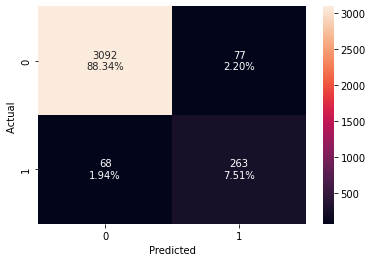

In [80]:
# creating confusion matrix
Plot_ConfusionMatrix(
    lg, X_train, Y_train, threshold=optimal_idx1
)

In [81]:
LogisticRegression_threshold_PR_Curve_TrainData = Check_ModelPerformance(
    lg, X_train, Y_train, threshold=optimal_idx1
)
print("Training performance:")
LogisticRegression_threshold_PR_Curve_TrainData

Training performance:


,Accuracy,Recall,Precision,F1
0,0.958571,0.794562,0.773529,0.783905


In [82]:
LogisticRegression_threshold_PR_Curve_TestData = Check_ModelPerformance(
    lg, X_test, Y_test, threshold=optimal_idx1
)
print("Testing performance:")
LogisticRegression_threshold_PR_Curve_TestData

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.956667,0.738255,0.808824,0.77193


Recall with AUC ( ROC) curve is better than PR curve

#  Decision Tree

Firt Let us Build  decision Tree using both Gini and Entropy criteria and see how it is performing on train test data 

In [83]:
## Let us Create Model for both  GINI as Criteria
model_gini=DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini.fit(X_train,Y_train)

## Let us Create Model for both  Entropy as Criteria
model_entropy=DecisionTreeClassifier(criterion='entropy', random_state=42)
model_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [84]:
## Confusion Matrix for  Classifer
def confusion_matrix_DT(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [85]:
##We will create this fcuntion to find performance factor for each model ( Accuracy , recall , Precision and F1 score)
def Model_Performance_Matric_DT(model, predictors, target):
   
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  
    recall = recall_score(target, pred)  
    precision = precision_score(target, pred)  
    f1 = f1_score(target, pred) 

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

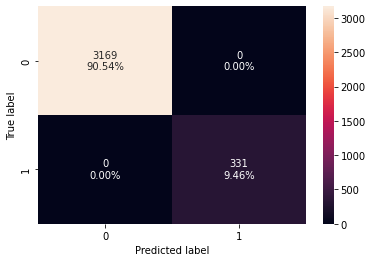

In [86]:
## Plot CM for Train Data for GINI 
confusion_matrix_DT(model_gini,X_train,Y_train)

In [87]:
GINIModel_TrainData=Model_Performance_Matric_DT(model_gini,X_train,Y_train)

In [88]:
GINIModel_TrainData

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


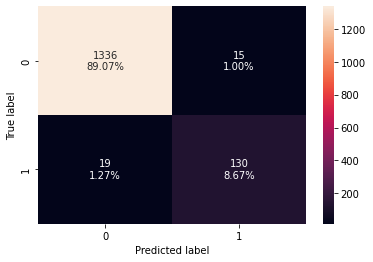

In [89]:
## Plot CM for Test Data for GINI 
confusion_matrix_DT(model_gini,X_test,Y_test)

In [90]:
GINIModel_TestData=Model_Performance_Matric_DT(model_gini,X_test,Y_test)

In [91]:
GINIModel_TestData


,Accuracy,Recall,Precision,F1
0,0.977333,0.872483,0.896552,0.884354


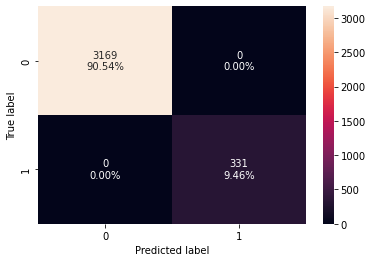

In [92]:
## Plot CM for Train Data for Entropy 
confusion_matrix_DT(model_entropy,X_train,Y_train)

In [93]:
EntropyModel_TrainData=Model_Performance_Matric_DT(model_entropy,X_train,Y_train)

In [94]:
EntropyModel_TrainData

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


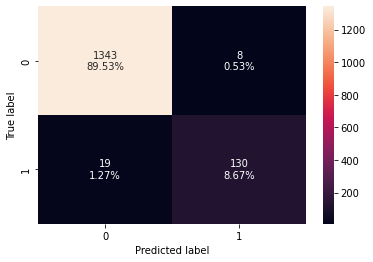

In [95]:
## Plot CM for Test Data for Entropy 
confusion_matrix_DT(model_entropy,X_test,Y_test)

In [96]:
EntropyModel_TestData=Model_Performance_Matric_DT(model_entropy,X_test,Y_test)
EntropyModel_TestData

,Accuracy,Recall,Precision,F1
0,0.982,0.872483,0.942029,0.905923


#  Let us Plot Decision Tree for both Models 

In [97]:
from sklearn.tree import plot_tree

In [98]:
print("Depth of DT using Gini")
model_gini.get_depth()

Depth of DT using Gini


12

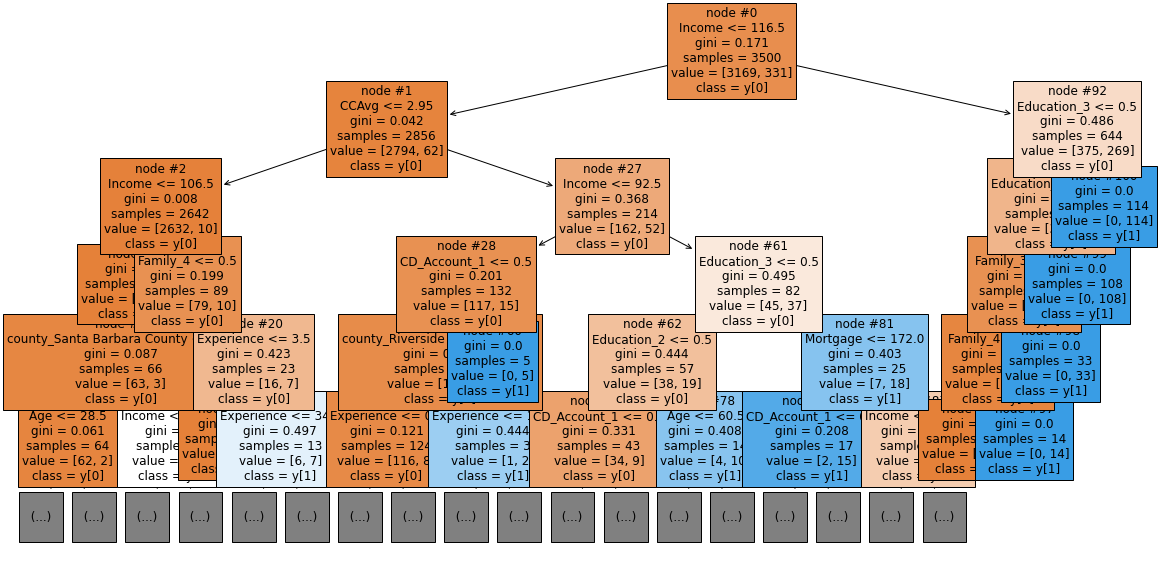

In [99]:
features=list(X.columns)
plt.figure(figsize=(20,10))
plot_tree(model_gini,max_depth=5,feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

In [100]:
## Let us Check Feature Importance for model generated using  criterio Gini 
feat_importance = model_gini.tree_.compute_feature_importances(normalize=False)

feature_cols=features

feat_imp_dict = dict(zip(feature_cols, model_gini.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)

feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head(20) #Top 10 features 

,FeatureImportance
Income,0.314638
Education_2,0.239413
Education_3,0.165389
Family_3,0.096966
Family_4,0.055026
CCAvg,0.043199
CD_Account_1,0.026348
Experience,0.023225
Age,0.013950
Mortgage,0.007453


We can see that for Model  geneerated using criterio Gini  Income , Education Level 2 and 3 ( Graduate and Professional) and Family of size 3 are importance Features.

In [101]:
## Let us Check Feature Importance for model generate using  criterio Entropy 
feat_importance = model_entropy.tree_.compute_feature_importances(normalize=False)

feature_cols=features

feat_imp_dict = dict(zip(feature_cols, model_entropy.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)

feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head(20) #Top 10 features 

,FeatureImportance
Income,0.524065
CCAvg,0.112380
Education_2,0.106622
Education_3,0.070380
Family_4,0.066749
Family_3,0.066356
CD_Account_1,0.015435
Experience,0.011175
Age,0.011135
Mortgage,0.006431


We can see for  Model generated using criteria Entropy Features Income, Credit Card Averange and Education Level Graduate are important Features  . When we compared both Models , with Gini we get slightly better list of Important Features. 

Let us   Plot Performance for Train and Test data using Gini Model

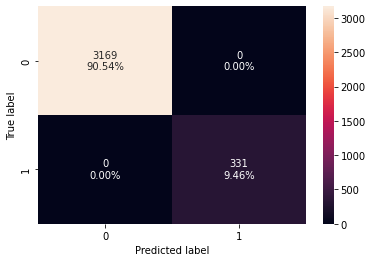

In [103]:
confusion_matrix_DT(model_gini,X_train,Y_train)

In [104]:
GiniModel_TrainData=Model_Performance_Matric_DT(model_gini,X_train,Y_train)

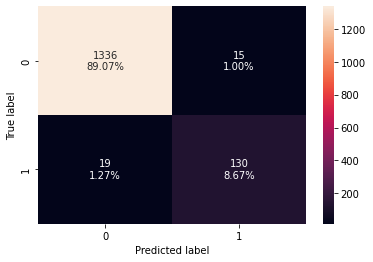

In [105]:
confusion_matrix_DT(model_gini,X_test,Y_test)

In [109]:
GiniModel_TestData=Model_Performance_Matric_DT(model_gini,X_test,Y_test)

In [110]:
GiniModel_TestData

,Accuracy,Recall,Precision,F1
0,0.977333,0.872483,0.896552,0.884354


Recall score  is 87 which is good but still there is disparity in performance of model on training set and test set, which suggests that the model is overfiiting.Let see by  hyper Parameter Tuning 

## GridSearch ##

We will use Grid search which is a tuning technique that attempts to compute the optimum values of hyperparameters.
The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

HyperParameters
Findings (Parameters used for building the tree)

1. criterion - Gini impurity is used to decide the variables based on which root node and following decision nodes should be split
2. class_weight - None; All classes are assigned weight 1
3. max_depth - None; No pruning is done. None signifies that nodes will be expanded till all leaves are pure or all leaves have less than min_samples_split
4. max_features - None; All features are considered while deciding split of a node
5. max_leaf_nodes - None;
min_impurity_decrease - 0.0; A node is split only when the split ensures a decrease in the impurity of greater than or equal to zero
6. min_impurity_split - None;
7. min_samples_leaf - 1; The minimum number of samples required for a leaf node. Note by default, DecisionTreeClassifier ensures that there should be at least 1 sample in the left and right branches for a split to happen
8. min_samples_split - 2; Depends on min_samples_leaf
9. splitter - 'best'; Strategy used to choose the split at each node. Best ensure that all features are considered while deciding the split

   Features we will try  in Hyper Tuning

1. Earlier we have see maximum Depth of tree is 12 so we know for hyper
  paramter tuing we can set upper limit on 12 as it won't grow beyond it .
2. We will use Criteria as GINI as second parameter.
3. min_impurity_decrease
4.  Max Features
5. Class _weight 
6. splitter

In [111]:
tunedModel = DecisionTreeClassifier(random_state=1) #defeault model


# Grid of parameters to choose from (hyper parameters)
parameters = {
            'max_depth': np.arange(5, 12), 
            'class_weight': ['balanced'],  
            'criterion': ['entropy','gini'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001, 0.001], 
            'max_features': ['log2','sqrt'] ,
           # 'splitter':['best']
         #  'max_leaf_nodes': [10, 20, 30, 40],
           # 'min_samples_split': [10, 30, 50, 70],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(tunedModel, parameters, scoring=scorer,cv=3) #---cross validation
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
tunedModel = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
tunedModel.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features='sqrt',
                       min_impurity_decrease=0.001, random_state=1)

In [112]:
feat_importance = tunedModel.tree_.compute_feature_importances(normalize=False)

feature_cols=features

feat_imp_dict = dict(zip(feature_cols, tunedModel.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)

feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head(20) #Top 10 features 

,FeatureImportance
Income,0.455614
CCAvg,0.410103
Education_2,0.070719
Education_3,0.021457
CD_Account_1,0.021418
Family_4,0.005624
Age,0.005500
Family_3,0.003845
Experience,0.003616
county_Monterey County,0.002104


In [113]:
print("Depth of DT using Tuned Model")
tunedModel.get_depth()

Depth of DT using Tuned Model


6

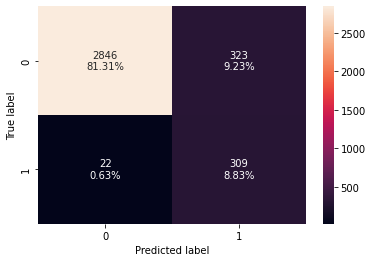

In [114]:
confusion_matrix_DT(tunedModel,X_train,Y_train)

In [115]:
tunedModel_TrainData=Model_Performance_Matric_DT(tunedModel,X_train,Y_train)

In [116]:
tunedModel_TrainData

,Accuracy,Recall,Precision,F1
0,0.901429,0.933535,0.488924,0.641745


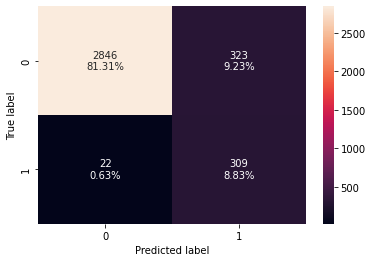

In [117]:
confusion_matrix_DT(tunedModel,X_train,Y_train)

In [118]:
tunedModel_TestData=Model_Performance_Matric_DT(tunedModel,X_test,Y_test)

In [119]:
tunedModel_TestData

,Accuracy,Recall,Precision,F1
0,0.906667,0.966443,0.516129,0.672897


In [120]:
feat_imp_req=feat_imp[feat_imp['FeatureImportance']>0]

feat_imp_req.head(20)

,FeatureImportance
Age,0.005500
Experience,0.003616
Income,0.455614
CCAvg,0.410103
Family_3,0.003845
Family_4,0.005624
Education_2,0.070719
Education_3,0.021457
CD_Account_1,0.021418
county_Monterey County,0.002104


# Model Performance Comparision


#  Logistic Model performance comparison on Trainng Data



In [121]:
Logistic_Regression_Model_TrainData = pd.concat(
    [
        LogisticRegression_TrainData.T,
        LogisticRegression_threshold_auc_roc_TrainData.T,
        LogisticRegression_threshold_PR_Curve_TrainData.T,
    ],
    axis=1,
)
Logistic_Regression_Model_TrainData.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.14Threshold",
    "Logistic Regression-0.32 Threshold",
]

print("Training performance comparison:")
Logistic_Regression_Model_TrainData


Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.14Threshold,Logistic Regression-0.32 Threshold
Accuracy,0.962571,0.936000,0.958571
Recall,0.688822,0.885196,0.794562
Precision,0.890625,0.611691,0.773529
F1,0.776831,0.723457,0.783905


#   Logistic Model Comparision on Test Data 

In [122]:
Logistic_Regression_Model_TestData = pd.concat(
    [
        LogisticRegression_TestData.T,
        LogisticRegression_threshold_auc_roc_TestData.T,
        LogisticRegression_threshold_PR_Curve_TestData.T,
    ],
    axis=1,
)
Logistic_Regression_Model_TestData.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.14Threshold",
    "Logistic Regression-0.32 Threshold",
]

print("Testing performance comparison:")
Logistic_Regression_Model_TestData

Testing performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.14Threshold,Logistic Regression-0.32 Threshold
Accuracy,0.954000,0.927333,0.956667
Recall,0.597315,0.805369,0.738255
Precision,0.908163,0.600000,0.808824
F1,0.720648,0.687679,0.771930


# Insights based on Logistic Regression Model



##Insights based on Logistic Regression Model

1.   Based on  comaprison between all three Logistic Regression Model we can see that Model with 0.14 threshould based on ROC curve  gives best recall rate of 80%

## While Pursuing any existing account holder to buy Personal Loan take into account following recommandations

1. People with more experience will have less odds of  taking personal Loan
2.  People with Family Size of 3 and more have odd of taking Personal Loan is more as copared to people with Family size of 2 .
3. People will Education level Graduate and Advance have odd of taking Personal Loan is more .
4. People  who currently have some Mortgage on their name have more chances of buying Personal Loan
5. People having security deposits and credit cards have less chances of but Personal Loan 
6. People from Country E--Dorado , Fresno , Huboldt, yolo have less chances of buying Personal Loans
7. People  with high Age group have less changes of buying Loan.



# Decision Tree Model performance comparison on Training Data


In [123]:
DecisionTree_TrainData = pd.concat(
    [
        GiniModel_TrainData.T,
        tunedModel_TrainData.T,
    ],
    axis=1,
)
DecisionTree_TrainData.columns = [
    " DefaultDecisionTree-GINI",
    "PrePrunedDecisionTree",
   
]

print("Model Comparision on Training Data :")
print("--"*40)
DecisionTree_TrainData


Model Comparision on Training Data :
--------------------------------------------------------------------------------


,DefaultDecisionTree-GINI,PrePrunedDecisionTree
Accuracy,1.0,0.901429
Recall,1.0,0.933535
Precision,1.0,0.488924
F1,1.0,0.641745


# Decision Tree Model performance comparison on Testing Data

In [124]:
DecisionTree_TestData = pd.concat(
    [
        GiniModel_TestData.T,
        tunedModel_TestData.T,
    ],
    axis=1,
)
DecisionTree_TestData.columns = [
    " DefaultDecisionTree-GINI",
    "PrePrunedDecisionTree",
   
]
print("Model Comparision on Testing Data :")
print("--"*40)
DecisionTree_TestData

Model Comparision on Testing Data :
--------------------------------------------------------------------------------


,DefaultDecisionTree-GINI,PrePrunedDecisionTree
Accuracy,0.977333,0.906667
Recall,0.872483,0.966443
Precision,0.896552,0.516129
F1,0.884354,0.672897


In [125]:
print(tree.export_text(tunedModel, feature_names=feature_cols, show_weights=True))

|--- CCAvg <= 2.85
|   |--- Income <= 106.50
|   |   |--- weights: [1399.34, 0.00] class: 0
|   |--- Income >  106.50
|   |   |--- weights: [115.97, 470.54] class: 1
|--- CCAvg >  2.85
|   |--- Education_3 <= 0.50
|   |   |--- Age <= 25.50
|   |   |   |--- weights: [3.87, 0.00] class: 0
|   |   |--- Age >  25.50
|   |   |   |--- CD_Account_1 <= 0.50
|   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |--- weights: [163.46, 116.31] class: 0
|   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |--- weights: [12.15, 37.01] class: 1
|   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |--- weights: [12.15, 348.94] class: 1
|   |   |   |--- CD_Account_1 >  0.50
|   |   |   |   |--- weights: [9.94, 237.92] class: 1
|   |--- Education_3 >  0.50
|   |   |--- CCAvg <= 4.55
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- Experience <= 32.50
|   |   |   |   |   |   |--- weight

# Insights based on Decision Tree Model

1.   Based on coparision between Decision tree Models we can see that Model which  is tuned with Hyper paraters of Crteria as Gini , tree depth as 6 , class weight as balance gives best recall result 0.93 .


## Recommandations for Pursuing any existing account holder to buy Personal Loan

1.   People who have CCAvg less than 2.85 and Income >= 106.50 have high chances of buying Personal Loans .
2.  People having Age more than 25 and family size of 4 and CCAvg usage more than 2.85  have more chances of busying Personal Loan
3. People having CC Avg more than 4.4 and Age is less than 52 have chances of buying Personal Loan .
4.  People having CC Avg more than 4.55 have high changes of buying Personal Loan.